In [ ]:
#BIPARTITE GRAPHS 
!pip install matplotlib networkx


import matplotlib.pyplot as plt
import networkx as nx
import random

def greedy_bipartite_graph(community_A, community_B, connections_per_node):
    graph = {node: [] for node in community_A + community_B}  # Initialize the graph

    for node in community_A:
        # Randomly select connections for the node from community_B
        available_nodes = list(community_B)  # All nodes in community B
        random.shuffle(available_nodes)  # Shuffle to ensure randomness
        
        # Connect to the first `connections_per_node` available nodes in community B
        for i in range(min(connections_per_node, len(available_nodes))):
            graph[node].append(available_nodes[i])
            graph[available_nodes[i]].append(node)  # Ensure the connection is bidirectional

    return graph

def draw_graph(graph):
    G = nx.Graph()
    
    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Create a color map for visualization
    color_map = ['red' if node in community_A else 'blue' for node in G.nodes()]

    # Manually position nodes: left for community A, right for community B
    pos = {}
    for i, node in enumerate(community_A):
        pos[node] = (-1, i)  # Community A positions (left)
    
    for i, node in enumerate(community_B):
        pos[node] = (1, i)  # Community B positions (right)

    # Draw the graph
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=16)
    plt.title("Greedy Bipartite Graph")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define two separate communities with flexible sizes
    community_A = [0, 1, 2, 3]  # First community 
    community_B = [4, 5, 6]      # Second community
    
    connections_per_node = 2  # Define how many connections each node in community A can have
    
    # Create the bipartite graph using a greedy algorithm
    graph = greedy_bipartite_graph(community_A, community_B, connections_per_node)
    
    print("Bipartite Graph Connections:")
    for node, neighbors in graph.items():
        print(f"Node {node}: {neighbors}")

    draw_graph(graph)

Is the graph bipartite? True
Greedy Maximum Matching: {(2, 'b'), (1, 'a'), (3, 'c')}


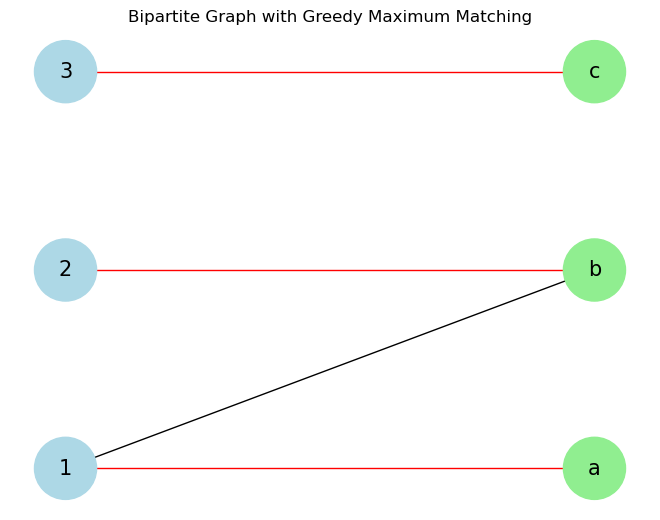

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create a bipartite graph
def create_bipartite_graph():
    B = nx.Graph()
    # Add nodes with the attribute "bipartite"
    top_nodes = {1, 2, 3}
    bottom_nodes = {'a', 'b', 'c'}
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)

    # Add edges between nodes in the two sets
    edges = [(1, 'a'), (1, 'b'), (2, 'b'), (3, 'c')]
    B.add_edges_from(edges)

    return B, top_nodes, bottom_nodes

# Greedy algorithm for maximum matching
def greedy_maximum_matching(B, top_nodes, bottom_nodes):
    matching = set()  # To store the matching pairs
    matched_nodes = set()  # To keep track of matched nodes

    # Iterate over edges greedily
    for u, v in B.edges():
        if u not in matched_nodes and v not in matched_nodes:
            matching.add((u, v))
            matched_nodes.add(u)
            matched_nodes.add(v)

    return matching

# Step 1: Create a bipartite graph
B, top_nodes, bottom_nodes = create_bipartite_graph()

# Step 2: Check if the graph is bipartite
is_bipartite = bipartite.is_bipartite(B)
print(f"Is the graph bipartite? {is_bipartite}")

# Step 3: Perform greedy maximum matching if bipartite
if is_bipartite:
    # Apply the greedy maximum matching algorithm
    matching = greedy_maximum_matching(B, top_nodes, bottom_nodes)
    print(f"Greedy Maximum Matching: {matching}")

    # Step 4: Plot the graph with matching edges highlighted
    pos = nx.bipartite_layout(B, top_nodes)

    # Highlight matching edges in red
    matching_edges = list(matching)
    edge_colors = ['red' if (u, v) in matching_edges or (v, u) in matching_edges else 'black' for u, v in B.edges()]

    # Draw the graph with the highlighted matching
    nx.draw(B, pos, with_labels=True, edge_color=edge_colors, node_color=['lightblue' if n in top_nodes else 'lightgreen' for n in B.nodes()], node_size=2000, font_size=15)
    plt.title("Bipartite Graph with Greedy Maximum Matching")
    plt.show()
else:
    print("The graph is not bipartite.")